Атрибуты _fields, _field_defaults

Именованные кортежи имеют два дополнительных атрибута: _fields и _field_defaults. Первый атрибут содержит кортеж строк, в котором перечислены имена полей. Второй атрибут содержит словарь, который сопоставляет имена полей с соответствующими значениями по умолчанию, если таковые имеются.

In [1]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height'])

tim = Person('Тимур', 29, 170)

print(tim)
print(tim._fields)
print(Person._fields)

Person(name='Тимур', age=29, height=170)
('name', 'age', 'height')
('name', 'age', 'height')


Обратите внимание на то, что мы можем обращаться к атрибуту _fields как через переменную (tim), так и через сам тип именованного кортежа (Person).

С помощью атрибута _fields мы можем создавать новые именованные кортежи на основании уже существующих. В следующем примере мы создадим новый именованный кортеж с именем ExtendedPerson, который расширяет старый Person новым полем weight.

In [2]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height'])

ExtendedPerson = namedtuple('ExtendedPerson', [*Person._fields, 'weight'])  # распаковка полей старого кортежа

timur = ExtendedPerson('Тимур', 29, 170, 65)

print(timur)
print(ExtendedPerson._fields)

ExtendedPerson(name='Тимур', age=29, height=170, weight=65)
('name', 'age', 'height', 'weight')


Мы также можем использовать атрибут _fields для перебора полей и их значений с помощью встроенной функции zip():

In [3]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height'])

timur = Person('Тимур', 29, 170)

for field, value in zip(Person._fields, timur):
    print(field, '->', value)

name -> Тимур
age -> 29
height -> 170


С помощью атрибута _field_defaults мы можем выяснить, какие поля именованного кортежа имеют значения по умолчанию. Значения по умолчанию делают поля необязательными. Например, предположим, что наш именованный кортеж Person должен включать дополнительное поле для хранения страны, в которой живет человек. Поскольку в основном мы работаем с людьми из России, то мы устанавливаем соответствующее значение по умолчанию для поля страны следующим образом:

In [4]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height', 'country'], defaults=['Russia'])

timur = Person('Тимур', 29, 170)

print(timur)
print(timur._field_defaults)
print(Person._field_defaults)

Person(name='Тимур', age=29, height=170, country='Russia')
{'country': 'Russia'}
{'country': 'Russia'}


In [5]:
from collections import namedtuple

# Указываем значения по умолчанию для height и country
Person = namedtuple('Person', ['name', 'age', 'height', 'country'], defaults=[170, 'Russia'])

# Создаем экземпляр без указания роста и страны
timur = Person('Тимур', 29)

print(timur)  # Вывод: Person(name='Тимур', age=29, height=170, country='Russia')
print(timur._field_defaults)  # Вывод: {'height': 170, 'country': 'Russia'}
print(Person._field_defaults)  # Вывод: {'height': 170, 'country': 'Russia'}

Person(name='Тимур', age=29, height=170, country='Russia')
{'height': 170, 'country': 'Russia'}
{'height': 170, 'country': 'Russia'}


Если именованный кортеж не предоставляет значений по умолчанию, тогда атрибут _field_defaults содержит пустой словарь.

In [6]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height', 'country'])

timur = Person('Тимур', 29, 170, 'Russia')

print(Person._field_defaults)

{}


Методы _make(), _replace(), _asdict()

Напомним, что обычные кортежи (tuple) имеют два встроенных метода:

index(): возвращает индекс первого элемента, значение которого равняется переданному значению
count(): возвращает количество элементов в кортеже, значения которых равны переданному значению

Именованные кортежи (тип namedtuple) являются производными от обычных кортежей (тип tuple), поэтому наследуют их методы, а также добавляют три новых: _make(), _replace(), _asdict().

Имена новых методов (_make(), _replace(), _asdict()) и атрибутов (_fields, _field_defaults) начинаются с подчеркивания, чтобы предотвратить конфликты имен с полями именованных кортежей.

Метод _make()

Метод _make() используется для создания именованных кортежей из итерируемых объектов (список, кортеж, строка, словарь и т.д.).

In [13]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height'])

timur = Person._make(['Timur', 29, 170])

print(timur)
print(*timur)
print(list(timur))
print(tuple(timur))

Person(name='Timur', age=29, height=170)
Timur 29 170
['Timur', 29, 170]
('Timur', 29, 170)


Обратите внимание на то, что метод _make() – это метод типа, а не конкретного экземпляра, поэтому вызывать его нужно через название типа (Person._make). Метод _make() работает как альтернативный конструктор типа.

Метод _asdict()

Мы можем преобразовывать именованные кортежи в словари с помощью метода _asdict(). Этот метод возвращает словарь, в котором имена полей используются в качестве ключей. Ключи результирующего словаря находятся в том же порядке, что и поля в исходном именованном кортеже.

In [8]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height'])

timur = Person._make(['Timur', 29, 170])

print(timur._asdict())

{'name': 'Timur', 'age': 29, 'height': 170}


До Python 3.8 метод _asdict() возвращал тип данных OrderedDict. В настоящий момент метод возвращает обычный словарь (тип dict), так как сейчас словари запоминают порядок добавления в них ключей.

Метод _replace()

Метод _replace() позволяет создавать новые именованные кортежи на основании уже существующих с заменой некоторых значений. Потребность в данном методе вызвана тем, что именованные кортежи являются неизменяемыми.

In [9]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height', 'country'])

timur1 = Person('Тимур', 29, 170, 'Russia')
timur2 = timur1._replace(age=30, country='Germany')

print(timur1)
print(timur2)

Person(name='Тимур', age=29, height=170, country='Russia')
Person(name='Тимур', age=30, height=170, country='Germany')


 Обратите внимание на то, что метод _replace() не изменяет текущий именованный кортеж, а возвращает новый.

In [14]:
from collections import namedtuple

Resolution = namedtuple('Resolution', ['horizontal', 'vertical'])

full_hd = Resolution(1920, 1070)

full_hd._replace(vertical=1080)

print(full_hd.vertical)

1070


In [15]:
from collections import namedtuple

Resolution = namedtuple('Resolution', ['horizontal', 'vertical'])

full_hd = Resolution(1920, 1070)

full_hd = full_hd._replace(vertical=1080)

print(full_hd.vertical)

1080


In [16]:
from collections import namedtuple

PcHardware = namedtuple('PcHardware', 'cpu,gpu,motherboard,ram', defaults=[None, None])

print(PcHardware._field_defaults)

{'motherboard': None, 'ram': None}


In [17]:
from collections import namedtuple

App = namedtuple('App', ['name', 'apptype', 'size'])

app = App._make('Discord messenger 200'.split())

print(*app)

Discord messenger 200


In [18]:
from collections import namedtuple

Device = namedtuple('Device', ['devicetype', 'model'])

device1 = Device(**{'devicetype': 'keyboard', 'model': 'Logitech G213'})
device2 = Device(*{'devicetype': 'keyboard', 'model': 'Logitech G213'})

print(*device1, sep=', ')
print(*device2, sep=', ')

keyboard, Logitech G213
devicetype, model


Дополните приведенный ниже код, чтобы он объявлял тип Fruit именованного кортежа с полями name, color и vitamins.

Примечание. Программа ничего не должна выводить.

In [ ]:
from collections import namedtuple

Fruit = namedtuple('Fruit', ['name', 'color', 'vitamins'])

In [ ]:
from typing import NamedTuple

class Fruit(NamedTuple):
    name: str
    color: str
    vitamins: list

In [ ]:
from collections import namedtuple
headers = ['name', 'color', 'vitamins']
Fruit = namedtuple('Fruit', headers)

Вам доступен именованный кортеж Game. Дополните приведенный ниже код, чтобы он объявлял тип ExtendedGame именованного кортежа, имеющего те же поля, что и Game, а также два дополнительных поля — release_date и price.

Примечание. Программа ничего не должна выводить.

In [ ]:
from collections import namedtuple

Game = namedtuple('Game', 'name developer publisher')

ExtendedGame = namedtuple('ExtendedGame', [*Game._fields, 'release_date', 'price'])

Вам доступен именованный кортеж Animal, который содержит данные о животном. Первым элементом именованного кортежа является имя животного, вторым — семейство, третьим — пол, четвертым — цвет. Также доступен файл data.pkl, содержащий сериализованный список таких кортежей.

Дополните приведенный ниже код, чтобы для каждого кортежа из этого списка он вывел названия его полей и значения этих полей в следующем формате:

name: <значение>
family: <значение>
sex: <значение>
color: <значение>
Между полями и значениями двух разных кортежей должна располагаться пустая строка.

Примечание 1. Сначала должно следовать содержание первого кортежа из списка, затем второго, и так далее.

Примечание 2. Например, если бы файл data.pkl содержал следующий сериализованный список:

[Animal(name='Alex', family='dogs', sex='m', color='brown'), Animal(name='Nancy', family='dogs', sex='w', color='black')]
то программа должна была бы вывести: 

name: Alex
family: dogs
sex: m
color: brown

name: Nancy
family: dogs
sex: w
color: black

In [ ]:
from collections import namedtuple

Animal = namedtuple('Animal', ['name', 'family', 'sex', 'color'])

In [50]:
import pickle
from collections import namedtuple

Animal = namedtuple('Animal', ['name', 'family', 'sex', 'color'])
with open('data.pkl', 'rb') as file:
    obj = pickle.load(file)
    
# print(obj)
# print()

for animal in obj:
    for field, value in zip(Animal._fields, animal):
        print(field, ': ', value, sep='')
    print()
    
# print()
# print(*Animal._fields)

name: Alex
family: dogs
sex: m
color: brown

name: Nancy
family: cats
sex: w
color: white

name: Sam
family: dogs
sex: m
color: brown

name: Misha
family: hedgehogs
sex: m
color: black

name: Fredd
family: cats
sex: m
color: white

name: Python
family: snakes
sex: w
color: white

name: Crispy
family: cats
sex: w
color: white

name: Adam
family: hedgehogs
sex: m
color: black

name: Daddy
family: snakes
sex: m
color: brown

name: Mickey
family: hedgehogs
sex: m
color: brown

name: Tom
family: cats
sex: m
color: white

name: Jerry
family: snakes
sex: m
color: brown

name: Chip
family: hedgehogs
sex: m
color: white


Вам доступен именованный кортеж User, который содержит данные о пользователе некоторого ресурса. Первым элементом именованного кортежа является имя пользователя, вторым — фамилия, третьим — адрес электронной почты, четвертым — статус оформленной подписки. Также доступен список users, содержащий эти кортежи.

Дополните приведенный ниже код, чтобы он вывел данные о каждом пользователе из этого списка, предварительно отсортировав их по статусу подписки от дорогой к дешевой, а при совпадении статусов — в лексикографическом порядке адресов электронных почт. Данные о каждом пользователе должны быть указаны в следующем формате:

<имя> <фамилия>
  Email: <адрес электронной почты>
  Plan: <статус подписки>
Между данными двух разных пользователей должна располагаться пустая строка.

Примечание 1. Самой дорогой подпиской считается Gold, затем Silver, Bronze и Basic.

Примечание 2. Начальная часть ответа выглядит так (в качестве отступов используйте два пробела):

Kathleen Lyons
  Email: balchen@att.net
  Plan: Gold

William Townsend
  Email: kosact@verizon.net
  Plan: Gold

...

In [69]:
from collections import namedtuple

User = namedtuple('User', ['name', 'surname', 'email', 'plan'])

users = [User('Mary', 'Griffin', 'sonnen@yahoo.com', 'Basic'),
         User('Brenda', 'Young', 'retoh@outlook.com', 'Silver'),
         User('Kathleen', 'Lyons', 'balchen@att.net', 'Gold'),
         User('Pamela', 'Hicks', 'corrada@sbcglobal.net', 'Silver'),
         User('William', 'Townsend', 'kosact@verizon.net', 'Gold'),
         User('Clayton', 'Morris', 'berserk@yahoo.com', 'Silver'),
         User('Dorothy', 'Dennis', 'sequin@live.com', 'Gold'),
         User('Tyler', 'Walker', 'noahb@comcast.net', 'Basic'),
         User('Joseph', 'Moore', 'ylchang@sbcglobal.net', 'Silver'),
         User('Kenneth', 'Richardson', 'tbusch@me.com', 'Bronze'),
         User('Stephanie', 'Bush', 'neuffer@live.com', 'Gold'),
         User('Gregory', 'Hughes', 'juliano@att.net', 'Basic'),
         User('Tracy', 'Wallace', 'sblack@me.com', 'Silver'),
         User('Russell', 'Smith', 'isaacson@comcast.net', 'Bronze'),
         User('Megan', 'Patterson', 'hoangle@outlook.com', 'Basic')]

dic ={'Gold': 0, 'Silver': 1, 'Bronze': 2, 'Basic': 3}
users = sorted(users, key=lambda x:[dic[x.plan], x.email])

# print(users[0])
# print()

for user in users:
    print(user.name, user.surname)
    print(f'  Email: {user.email}')
    print(f'  Plan: {user.plan}')
    print()

Kathleen Lyons
  Email: balchen@att.net
  Plan: Gold

William Townsend
  Email: kosact@verizon.net
  Plan: Gold

Stephanie Bush
  Email: neuffer@live.com
  Plan: Gold

Dorothy Dennis
  Email: sequin@live.com
  Plan: Gold

Clayton Morris
  Email: berserk@yahoo.com
  Plan: Silver

Pamela Hicks
  Email: corrada@sbcglobal.net
  Plan: Silver

Brenda Young
  Email: retoh@outlook.com
  Plan: Silver

Tracy Wallace
  Email: sblack@me.com
  Plan: Silver

Joseph Moore
  Email: ylchang@sbcglobal.net
  Plan: Silver

Russell Smith
  Email: isaacson@comcast.net
  Plan: Bronze

Kenneth Richardson
  Email: tbusch@me.com
  Plan: Bronze

Megan Patterson
  Email: hoangle@outlook.com
  Plan: Basic

Gregory Hughes
  Email: juliano@att.net
  Plan: Basic

Tyler Walker
  Email: noahb@comcast.net
  Plan: Basic

Mary Griffin
  Email: sonnen@yahoo.com
  Plan: Basic


In [ ]:
from collections import namedtuple

User = namedtuple('User', ['name', 'surname', 'email', 'plan'])

users = [
         User('Mary', 'Griffin', 'sonnen@yahoo.com', 'Basic'),
         User('Brenda', 'Young', 'retoh@outlook.com', 'Silver'),
         User('Kathleen', 'Lyons', 'balchen@att.net', 'Gold'),
         User('Pamela', 'Hicks', 'corrada@sbcglobal.net', 'Silver'),
         User('William', 'Townsend', 'kosact@verizon.net', 'Gold'),
         User('Clayton', 'Morris', 'berserk@yahoo.com', 'Silver'),
         User('Dorothy', 'Dennis', 'sequin@live.com', 'Gold'),
         User('Tyler', 'Walker', 'noahb@comcast.net', 'Basic'),
         User('Joseph', 'Moore', 'ylchang@sbcglobal.net', 'Silver'),
         User('Kenneth', 'Richardson', 'tbusch@me.com', 'Bronze'),
         User('Stephanie', 'Bush', 'neuffer@live.com', 'Gold'),
         User('Gregory', 'Hughes', 'juliano@att.net', 'Basic'),
         User('Tracy', 'Wallace', 'sblack@me.com', 'Silver'),
         User('Russell', 'Smith', 'isaacson@comcast.net', 'Bronze'),
         User('Megan', 'Patterson', 'hoangle@outlook.com', 'Basic')
        ]

for user in sorted(users, key=lambda u: (["Gold", "Silver", "Bronze", "Basic"].index(u.plan), u.email)):
    print(f"{user.name} {user.surname}")
    print(f"  Email: {user.email}")
    print(f"  Plan: {user.plan}")
    print()

Вы кто такие? Я вас не звал
У Тимура имеется немало друзей из других городов или стран, которые часто приезжают к нему в гости с целью увидеться и развлечься. Чтобы не забыть ни об одной встрече, Тимур записывает имена и фамилии друзей в csv файл, дополнительно указывая для каждого дату и время встречи. Вам доступен этот файл, имеющий название meetings.csv, в котором в первом столбце записана фамилия, во втором — имя, в третьем — дата в формате DD.MM.YYYY , в четвертом — время в формате HH:MM:

surname,name,meeting_date,meeting_time
Харисов,Артур,15.07.2022,17:00
Геор,Гагиев,14.12.2022,18:00
...
Напишите программу, которая выводит фамилии и имена друзей Тимура, предварительно отсортировав их по дате и времени встречи от самой ранней до самой поздней. Фамилии и имена должны быть расположены каждые на отдельной строке.

Примечание 1. Начальная часть ответа выглядит так:

Гудцев Таймураз
Харисов Артур
Базиев Герман
...
Примечание 2. Гарантируется, что никакие две встречи не имеют одновременно одинаковые даты и время.

Примечание 3. Указанный файл доступен по ссылке. Ответ на задачу доступен по ссылке.

Примечание 4. Разделителем в файле meetings.csv является запятая, при этом кавычки не используются.

Примечание 5. При открытии файла используйте явное указание кодировки UTF-8.

In [14]:
import csv
from datetime import datetime


with open('meetings.csv', encoding='utf-8') as file:
    data = list(csv.DictReader(file))
    for row in data:
        row['meeting_date'] = datetime.strptime(row['meeting_date'], '%d.%m.%Y')
        row['meeting_time'] = datetime.strptime(row['meeting_time'], '%H:%M')
        
    data = sorted(data, key=lambda x:(x['meeting_date'], x['meeting_time']))
    
    for row in data:
        print(f'{row['surname']} {row['name']}')


Гудцев Таймураз
Харисов Артур
Базиев Герман
Макоев Руслан
Найфонов Сослан
Короев Аслан
Дедегкаев Давид
Уртаева Илина
Бекузарова Фатима
Акоева Лера
Белов Глеб
Букулова Диана
Гусейнова Марьям
Набокова Алиса
Чередник Марк
Перчиков Максим
Идрисов Баграт
Абаев Михаил
Елькина Мария
Кораев Давид
Акоева Амина
Денисов Тимофей
Алдатов Сармат
Зеленчук Александра
Тарасов Станислав
Гапбаев Герман
Рыжая Ярослава
Джикаев Таму
Балаболка Вероника
Гагиев Геор
Козаев Роберт
Габараев Артур
Юлдашев Хандамир
Кодзаев Георгий
Дедегкаев Дамир
Момотов Владислав
Щербак Юрий
Чуприков Максим
Тиникашвили Давид
Кораев Артур
Цивинская Анна
Солдатенков Илья
Туткевич Юрий
Маилян Кирилл
Джиоева Марина
Салбиев Максим
Чен Владимир
Капустин Егор
Туаллагов Давид
Губаев Герман
Кузнецов Станислав
Албегов Хетаг
Битиев Сослан
Мусиков Андраник
Уртаева Дзера
Гадзиев Георгий
Епхиева Алика
Шилин Александр


In [ ]:
import csv
from collections import namedtuple
from datetime import datetime

with open('meetings.csv', encoding='u8') as fi:
    rows = csv.DictReader(fi)
    Friend = namedtuple('Friend', rows.fieldnames)
    meetings = [Friend(**row) for row in rows]

meetings.sort(key=lambda item: datetime.strptime(f'{item.meeting_date} {item.meeting_time}', '%d.%m.%Y %H:%M'))
for meeting in meetings:
    print(meeting.surname, meeting.name)

In [15]:
import csv
from collections import namedtuple
from datetime import datetime

# Создаем namedtuple для удобства работы с данными
Friend = namedtuple('Friend', ['surname', 'name', 'meeting_date', 'meeting_time'])

# Открываем файл meetings.csv с явным указанием кодировки UTF-8
with open('meetings.csv', encoding='utf-8') as file:
    reader = csv.reader(file)
    
    # Пропускаем заголовок
    next(reader)
    
    friends = []
    
    # Читаем данные из файла
    for row in reader:
        surname, name, meeting_date, meeting_time = row
        
        # Преобразуем строковые значения даты и времени в datetime для правильной сортировки
        meeting_datetime = datetime.strptime(f"{meeting_date} {meeting_time}", '%d.%m.%Y %H:%M')
        
        # Добавляем кортеж в список
        friends.append(Friend(surname, name, meeting_datetime, meeting_time))
    
    # Сортируем друзей по дате и времени встречи
    friends.sort(key=lambda x: x.meeting_date)
    
    # Выводим фамилии и имена в требуемом формате
    for friend in friends:
        print(f"{friend.surname} {friend.name}")

Гудцев Таймураз
Харисов Артур
Базиев Герман
Макоев Руслан
Найфонов Сослан
Короев Аслан
Дедегкаев Давид
Уртаева Илина
Бекузарова Фатима
Акоева Лера
Белов Глеб
Букулова Диана
Гусейнова Марьям
Набокова Алиса
Чередник Марк
Перчиков Максим
Идрисов Баграт
Абаев Михаил
Елькина Мария
Кораев Давид
Акоева Амина
Денисов Тимофей
Алдатов Сармат
Зеленчук Александра
Тарасов Станислав
Гапбаев Герман
Рыжая Ярослава
Джикаев Таму
Балаболка Вероника
Гагиев Геор
Козаев Роберт
Габараев Артур
Юлдашев Хандамир
Кодзаев Георгий
Дедегкаев Дамир
Момотов Владислав
Щербак Юрий
Чуприков Максим
Тиникашвили Давид
Кораев Артур
Цивинская Анна
Солдатенков Илья
Туткевич Юрий
Маилян Кирилл
Джиоева Марина
Салбиев Максим
Чен Владимир
Капустин Егор
Туаллагов Давид
Губаев Герман
Кузнецов Станислав
Албегов Хетаг
Битиев Сослан
Мусиков Андраник
Уртаева Дзера
Гадзиев Георгий
Епхиева Алика
Шилин Александр


Сравнение именованных кортежей и словарей

Словарь (dict) — это фундаментальная структура данных в Python. Сам язык построен на словарях, они используются повсюду. Несложно заметить, что функционал именованных кортежей можно полностью заменить функционалом словарей. Давайте проведем небольшое сравнение именованных кортежей и словарей по следующим параметрам:

читабельность (readability)
изменяемость (mutability)
потребление памяти (memory usage)
производительность (performance)

Читабельность

In [ ]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height'])

timur = Person('Тимур', 29, 170)

print(timur.name)
print(timur.age)
print(timur.height)

без потери читабельности можно заменить на код:

In [ ]:
timur = {'name': 'Тимур', 'age': 29, 'height': 170}

print(timur['name'])
print(timur['age'])
print(timur['height'])

В обоих примерах мы полностью понимаем код и его назначение. Однако для определения именованного кортежа требуются две дополнительные строки кода: одна строка для импорта фабричной функции namedtuple(), а другая — для определения самого именованного кортежа Person.

Доступ к атрибутам через точечную нотацию выглядит немного аккуратнее чем через квадратные скобки. Также нужно заметить, что при использовании квадратных скобок нам нужно использовать символ кавычки.

Изменяемость

Большая разница между обеими структурами данных заключается в том, что словари изменяемы, а именованные кортежи неизменны. Это означает, что вы можете изменять словари на месте (подобно спискам), но не можете изменять именованные кортежи (как и обычные кортежи).

In [16]:
timur = {'name': 'Тимур', 'age': 29, 'height': 170}
timur['age'] = 30      # изменяем значение в словаре

print(timur['age'])    # выводим измененное значение

30


In [17]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'age', 'height'])

timur = Person('Тимур', 29, 170)
timur.age = 30

print(timur.age)

AttributeError: can't set attribute

Мы всегда можем обновить значение существующего ключа в словаре, но не можем сделать того же самого в именованном кортеже

 Мы также можем добавлять новые пары "ключ-значение" в существующие словари, но не можем добавлять пары "поле-значение" в существующие именованные кортежи.

В именованных кортежах мы можем использовать  метод _replace() для обновления значения некоторого поля, но этот метод создает и возвращает новый именованный экземпляр кортежа вместо обновления на месте.

Потребление памяти

Для сравнения потребления памяти именованным кортежем и словарем мы будем использовать функцию asizeof() модуля pympler.

In [18]:
from collections import namedtuple
from pympler import asizeof

Person = namedtuple('Person', ['name', 'age', 'height'])

timur = Person('Тимур', 29, 170)
timur_dct = {'name': 'Тимур', 'age': 29, 'height': 170}

print(f'Именованный кортеж: {asizeof.asizeof(timur)} байт')
print(f'Словарь: {asizeof.asizeof(timur_dct)} байт')

Именованный кортеж: 200 байт
Словарь: 464 байт


Именованный кортеж потребляет меньше памяти (примерно на 63%), чем эквивалентный словарь. Поэтому, если потребление памяти является ограничением, следует подумать об использовании именованного кортежа вместо словаря.

Когда мы сравниваем именованные кортежи и словари, разница в конечном потреблении памяти будет зависеть от количества полей (значений) и их типов. Используя разные значения, мы будем получать разные результаты.

Производительность

Наконец, нам нужно иметь представление о том, насколько сильно различаются именованные кортежи и словари с точки зрения производительности операций. Для этого мы будем тестировать операции принадлежности и операции доступа к атрибутам.

In [19]:
from collections import namedtuple
from time import perf_counter

def average_time(structure, test_func):
    time_measurements = []
    for _ in range(1_000_000):
        start = perf_counter()
        test_func(structure)
        end = perf_counter()
        time_measurements.append(end - start)
    return sum(time_measurements) / len(time_measurements) * int(10**9)

def time_dict(dictionary):
    'name' in dictionary
    'missing_key' in dictionary
    28 in dictionary.values()
    'missing_value' in dictionary.values()
    dictionary['age']

def time_namedtuple(named_tuple):
    'name' in named_tuple._fields
    'missing_field' in named_tuple._fields
    28 in named_tuple
    'missing_value' in named_tuple
    named_tuple.age

Person = namedtuple('Person', ['name', 'age', 'height'])

timur = Person('Тимур', 29, 170)
timur_dct = {'name': 'Тимур', 'age': 29, 'height': 170}

print(f'Именованный кортеж: {average_time(timur, time_namedtuple)} наносекунд')
print(f'Словарь: {average_time(timur_dct , time_dict)} наносекунд')

Именованный кортеж: 191.08409609179944 наносекунд
Словарь: 295.0780093087815 наносекунд


Таким образом, именованные кортежи работают немного быстрее, чем словари по отношению к операциям принадлежности и доступа к атрибутам.

Итоговая таблица сравнения:

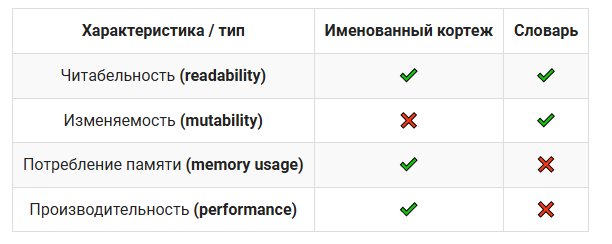

In [20]:
from functions import picture
picture('Без имени11.png')